# Python plotting with matplotlib #

This tutorial will give a basic introduction to plotting in python with the matplotlib library. It is based on the tutorials given in https://matplotlib.org/stable/tutorials/index.html, so look this page up for more information!

## 1. quick and simple plot ##

First, we import the plotting interface of matplotlib, "pyplot" and give it the short abbreviation "plt" for easier use in our code. We also import another very useful library, "numpy", which allows for optimized handling of data arrays, e.g. it can easily do vector addition, multiplication, matrix multiplication, etc. In fact, even if you work with python lists, matplotlib will convert them internally into numpy arrays, so we might as well use numpy arrays directly.

In [156]:
#import the matplotlib.pyplot library as "plt"
import matplotlib.pyplot as plt
#import numpy
import numpy as np

Matplotlib graphs the data on "Figures", each Figure contains one or more "Axes".

<div>
<img src="https://matplotlib.org/stable/_images/anatomy.png" width="600"/>
</div>

So, given some data, we can create a simple plot like this:

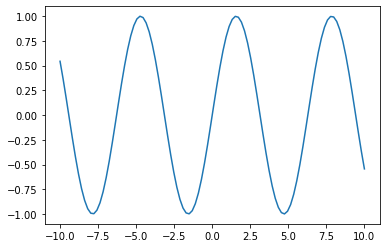

In [157]:
#create some data
x = np.linspace(-10,10,100)
y = np.sin(x)

#create Figure and Axes to graph data on
fig, ax = plt.subplots()

#plot the data in the axes which we named "ax"
ax.plot(x,y)

Here, we created a Figure and an Axes object which we named "ax", and then called its .plot() method to graph the data.

You do not have to explicitly initiate the figure and axes. For each Axes graphing method (like the .plot() method we just used, other methods can be found here https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), the pyplot module provides a function that performs the plot on the "current" axes, creating that axes (and its parent figure) if it is not existent yet. 

This means we can simply write plt.plot(), matplotlib automatically generates a Figure and Axes if there are none existing yet, and then graphs the data onto the newly created "current" axes.

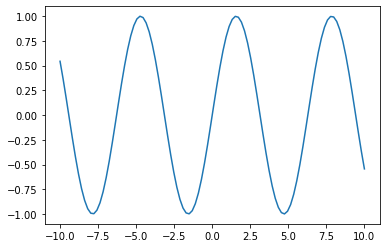

In [158]:
plt.plot(x,y)

This shows that there are essentially two ways of using matplotlib:
- The "object-oriented (OO)" style, creating figures and axes explicitly
- Using pyplot functions to automatically handle figures and axes

Both styles are equally powerful (but the pyplot method is generally less flexible), you can choose freely which to use (but should stick to one). In general, it is advised to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook like this one), and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project, i.e. your assignments). In the following examples, I will always use the OO-method for plotting.

## 2. customizing the plot ##

You can refine your plot in multiple ways: You can specify the scaling and the limits of your x and y axis, you can add a title, x and y labels, a legend, annotations, you can also add a grid, modify the axis ticks, and so on. For a line plot, you can specify the linestyle, color, linewidth, transparency, etc. Look up the documentation webpage of matplotlib for a detailed description of all the possibilities, e.g. you can find the abbreviations of colors and linestyles for the ax.plot() routine here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot.


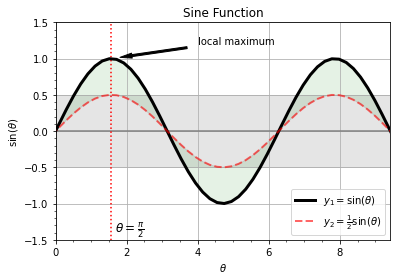

In [183]:
#create some data
x = np.linspace(-10,10,100)
y = np.sin(x)

#initiate fig and ax
fig, ax = plt.subplots()

#plot data into ax
ax.plot(x,y, "k-", linewidth = 3, label = r"$y_1 = \sin(\theta)$")
line, = ax.plot(x,0.5*y, color = "green", linestyle = "--", linewidth = 2, alpha = 0.6, label = r"$y_2 = \frac{1}{2} \sin(\theta)$")
line.set_color("red")
#define limits with [xmin, xmax, ymin, ymax] 
ax.axis([0,3*np.pi,-1.5,1.5])
#this also works for setting the axis limits:
ax.set_xlim([0,3*np.pi])
ax.set_ylim([-1.5,1.5])


#x and y label
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\sin(\theta)$")

#plot title
ax.set_title("Sine Function")

#adds some text into the plot: ax.text(x-coordinate, y-coordinate, yourtext)
t = ax.text(np.pi/2 + 0.1,-1.4, r"$\theta = \frac{\pi}{2}$")
#you can also set properties after adding the text to the figure
t.set_fontsize(12)

#adds a grid to the plot
ax.grid(which = "major", b = True)

#adds some annotation with an arrow
ax.annotate('local maximum', xy=(np.pi/2, 1), xytext=(4, 1.2), arrowprops=dict(width = 2, headwidth = 5, facecolor='black', shrink=0.1))

#adds the legend, including all defined labels automatically
ax.legend(loc = "lower right")

#adds some horizontal and vertical lines
ax.hlines(0,0,13, colors = "grey", linestyles = "solid")
ax.vlines(np.pi/2,-2,2, colors = "red", linestyles = "dotted")


#define some shaded area
ax.fill_between(x, -0.5, 0.5, alpha = 0.2, facecolor = "grey", edgecolor = "black", linewidth = 1)

#you can also fill between some functions
ax.fill_between(x, y, 0.5*y, alpha = 0.1, facecolor = "green", edgecolor = "black", linewidth = 1)

#add minor ticks
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#save figure
fig.savefig("sine.pdf")
fig.savefig("sine.png")

#display the figure
plt.show()

#close the figure
plt.close()

## 3. some different types of plots

In [151]:
(line[0])


As mentioned before, a figure can contain more than one axes element. This means you can easily make a figure with as many plots as you like in different axes windows. In addition to a 2D line plot, there are multiple more ways you can represent your data, such as a scatter plot, a contour plot, a histogram, bar plots, etc. Examples for all of these functionalities are given below.

Text(0.5, 1.0, 'contour plot')

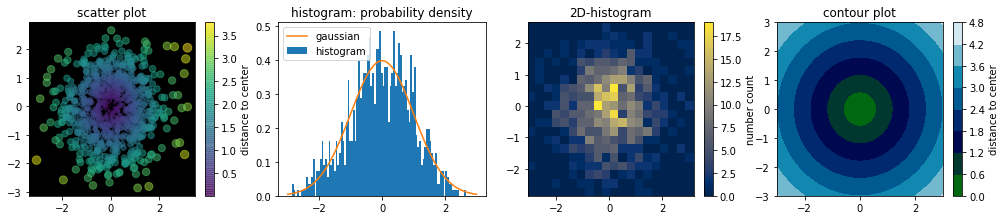

In [199]:

#create some data points
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
#calculate distance to center
z = np.sqrt(x**2 + y**2)

#initiate figure with size given by figsize and multiple axes
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize = (14,3))
#choose a tight layout
fig.tight_layout()
#you can also set your layout manually with 
#plt.subplots_adjust()


#scatter plot, color by distance from center, size by distance from center
cp = ax1.scatter(x,y, marker = "o", c = z, s = z*20, alpha = 0.5)
fig.colorbar(cp, ax = ax1, label = "distance to center")
ax1.set_title("scatter plot")
#you can change the background color
ax1.set_facecolor("black")

#1D histogram
ax2.hist(y, density = 1, bins = 100, label = "histogram")
#plot bell curve
xg = np.linspace(-3,3,100)
yg = 1/np.sqrt(2*np.pi)*np.exp(-xg**2/2)
ax2.plot(xg, yg, label = "gaussian")
ax2.legend()
ax2.set_title("histogram: probability density")

#2D histogram
hist, xedges, yedges, image = ax3.hist2d(x,y, density = 0, bins = 20, cmap = "cividis")
fig.colorbar(image, ax = ax3, label = "number count")
ax3.set_title("2D-histogram")

#contour plot
#create some 2D grid
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
#calculate a value on each pixel of the 2D grid, like the distance to the (0,0) coordinate
Z = np.sqrt(X**2 + Y**2)
#show the contours of Z on the X,Y grid
cp = ax4.contourf(X, Y, Z, cmap = "ocean")
#add colorbar
fig.colorbar(cp, label = "distance to center")
ax4.set_title('contour plot')

- colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

## 4. changing the scaling of the axis

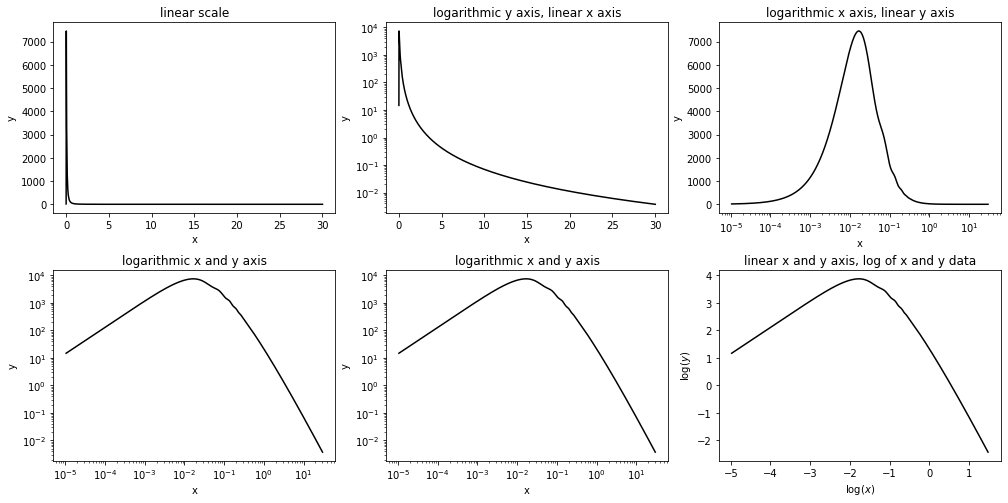

In [200]:
#load some nonlinear data
x2, y2 = np.loadtxt("lc_settings00_pk_cb.dat", unpack = True)
#x2 = np.linspace(1,10,100)
#y2 = 10**x2

#initiate figure with size given by figsize and multiple axes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize = (14,7))
fig.tight_layout()

#if we plot the data on a linear scale, we cannot see the small x behaviour well
ax1.plot(x2, y2, "k-")
ax1.set_title("linear scale")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

#graph x and y data onto log scaled y axis
ax2.set_yscale("log")
ax2.plot(x2,y2, "k-")
ax2.set_title("logarithmic y axis, linear x axis")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
#this also works:
ax3.semilogx(x2,y2, "k-")
ax3.set_title("logarithmic x axis, linear y axis")
ax3.set_xlabel("x")
ax3.set_ylabel("y")

#we can also make a loglog plot
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.plot(x2,y2, "k-")
ax4.set_title("logarithmic x and y axis")
ax4.set_xlabel("x")
ax4.set_ylabel("y")
#this also works:
ax5.loglog(x2,y2, "k-")
ax5.set_title("logarithmic x and y axis")
ax5.set_xlabel("x")
ax5.set_ylabel("y")

#we can also take the log of the data before plotting
ax6.plot(np.log10(x2), np.log10(y2), "k-")
ax6.set_title("linear x and y axis, log of x and y data")
#notice the axis need to be labeled accordingly
ax6.set_ylabel(r"$\log(y)$")
ax6.set_xlabel(r"$\log(x)$")

#adjust the layout
#fig.tight_layout()
plt.subplots_adjust(left=0.05, bottom=0.08, right=0.99, top=0.95, wspace=0.18, hspace=0.3)

#save figure
plt.savefig("scales.pdf")